In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from __future__ import division
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import cv2



# Foto grande

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
%matplotlib inline
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 6, 6


In [21]:
imgX = Image.open("/content/drive/MyDrive/MArylin.JPG")  # open colour image
imgX = imgX.convert('L')
img = np.asarray(imgX)
img = 2*(img > 128).astype(int)-1

In [22]:
img

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

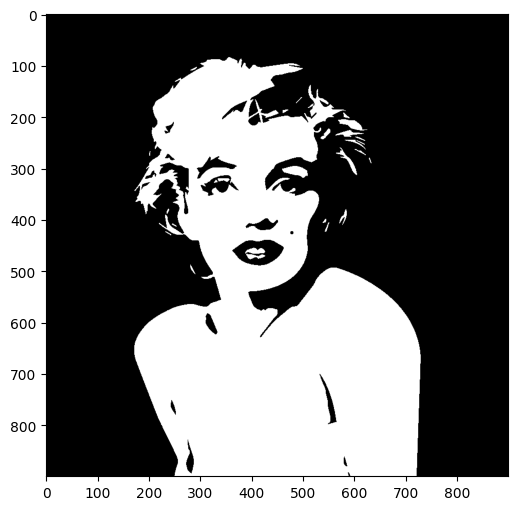

In [23]:
plt.imshow(img,cmap='gray',vmin=-1,vmax=1)
plt.show()

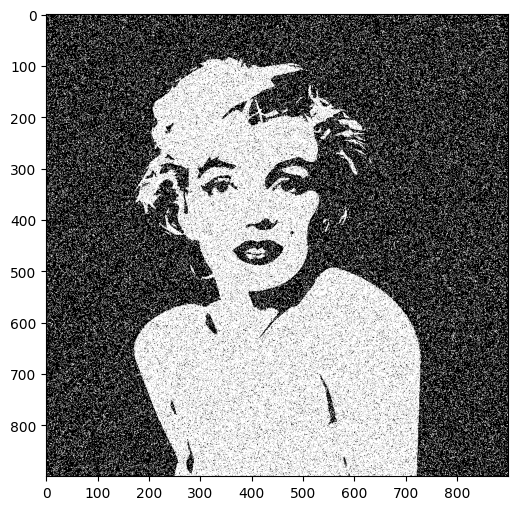

In [24]:

#create a noisy binary image
noise = np.random.random(img.shape)
noise = where(noise<0.15,-1,1)
Y = np.array(img*noise) #observed noisy binary image.

height,width = Y.shape
N = height*width

imgplot = plt.imshow(Y, cmap = cm.Greys_r)
plt.show()

## **Metropolis Gaussian2**

In [ ]:

sigma_squared = 1
N = height*width

beta = 0.8 # for arbitrary parameters that reflects our prior belief

T = 10000000 # sufficient number of steps to converge stationary distribution

errorM= np.zeros(T)


X = Y.copy() # Initialize Z from X
for t in range(T):
    i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)

    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    delta_E = -2*Y[i,j]*X[i,j]/sigma_squared -2*beta*X[i,j]*(np.sum(X[max(i-1,0):i+2,max(j-1,0):j+2]) - X[i,j])

    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.

    # Flip the pixel if accepted
    if np.log(np.random.rand()) < delta_E:
        X[i,j] = - X[i,j] # Update the image

    errorM[t]=np.sum(img != X)


In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(img,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(Y,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(X,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()

In [ ]:

x = np.linspace(0, T, T)
# Plot the array against x
plt.plot(x, (errorM*100/(width*height)))
plt.xlabel('# iteration')
plt.ylabel('Error %')
plt.title('Evolution of Metropolis-Hastings error w.r.t the number of iterations')
plt.grid(True)
plt.show()

## **Gibbs gaussian2**

In [ ]:
alpha = 0.0
sigma_squared = 1.4
num_burnin = 5
num_samples = 3
N = height*width

beta = 0.8 # for arbitrary parameters that reflects our prior belief

T = 10000000 # sufficient number of steps to converge stationary distribution
errorG= np.zeros(T)

X2 = Y.copy() # Initialize Z from X
for t in range(T):
    i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)


    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    energy =  beta*(np.sum(X2[max(i-1,0):i+2,max(j-1,0):j+2]) - X2[i,j])
    term1=np.exp(energy -(0.5/sigma_squared)*(Y[i,j]-1)**2)
    term2=np.exp(-energy - (0.5/sigma_squared)*(Y[i,j]+1)**2)
    Prob_Xij_one_given_neighbors = float(term1)/(term1+term2)
    Prob_Xij_minus_one_given_neighbors = 1.0 - Prob_Xij_one_given_neighbors #float(term2)/(term1+term2)

    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.

    # Flip the pixel if accepted

    X2[i,j]=-1 if np.random.rand()<=Prob_Xij_minus_one_given_neighbors else 1

    errorG[t]=np.sum(img != X2)

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(img,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(Y,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(X2,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()

In [ ]:

x = np.linspace(0, T, T)
# Plot the array against x
plt.plot(x, (errorG*100/(width*height)))
plt.xlabel('# iteration')
plt.ylabel('Error %')
plt.title('Evolution of Metropolis-Hastings error w.r.t the number of iterations')
plt.grid(True)
plt.show()